## Library import & Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


- BHK - Number of Bedrooms, Hall, Kitchen
- Rent - Price of the Houses/Apartments/Flats
- Size - Size of the Houses/Apartments/Flats in Square Feet
- Floor - Houses/Apartments/Flats situated in which Floor and Total Number of Floors
- Area Type - Size of the Houses/Apartments/Flats calculated on
- Area Locality - Locality of the Houses/Apartments/Flats
- City - City where the Houses/Apartments/Flats are Located
- Furnishing Status - Furnishing Status of the Houses/Apartments/Flats
- Tenant Preferred - Type of Tenant Preferred by the Owner or Agent
- Bathroom - Number of Bathrooms
- Point of Contact - Whom should you contact for more information regarding the Houses/Apartments/Flats

## Information about the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
df['DoW'] = pd.to_datetime(df["Posted On"]).dt.day_name()

In [9]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
# Checking null values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
DoW                  0
dtype: int64

In [8]:
# Checking if there is any Duplicate value present in the Dataset?
df.duplicated().sum()

0

## EDA Dataset

### Number of House in Each City which is Available for Rent

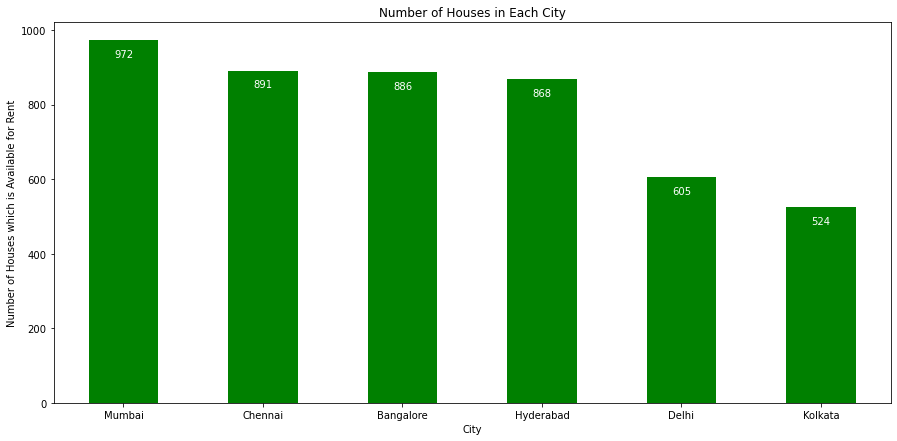

In [13]:
# plt.figure(figsize=(20, 8))
ax = df["City"].value_counts().plot(kind='bar', color='green', rot=0, figsize=(15, 7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 50),
                ha = 'center',
                va = 'bottom',
                color = 'white')
plt.title("Number of Houses in Each City")
plt.ylabel("Number of Houses which is Available for Rent")
plt.xlabel("City")
plt.show()

### Average Price for each City

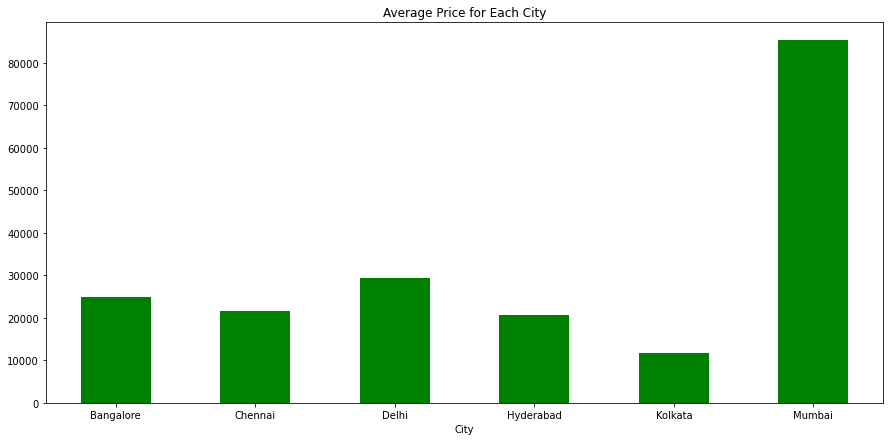

In [14]:
# plt.figure(figsize=(20, 8))
df.groupby(["City"])["Rent"].mean().plot(kind='bar', color='green', rot=0, figsize=(15, 7))
plt.title("Average Price for Each City")
plt.show()

We can see the rental price in Mumbai is much higher than other cities

## Why are rental price in Munbai higher than other cities?

### Explore the Features impact to rental price

In [17]:
# Check features impact to rental price
features = ['BHK', 'Size','Area Type',  'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact']

In [18]:
def city_eda(df, ft):
    if df[ft].dtype == int:
        plt.figure(figsize=(15, 7))
        df.groupby(["City"])[ft].mean().plot(kind='bar', color='orange', rot=0)
        plt.title(f'Average {ft} in each cities')
        plt.show()
    if df[ft].dtype == object:
        plt.figure(figsize=(15, 7))
        sns.countplot(data=df, x='City', hue=ft)
        plt.title(f"{ft} for each Cities")
        plt.show()
        

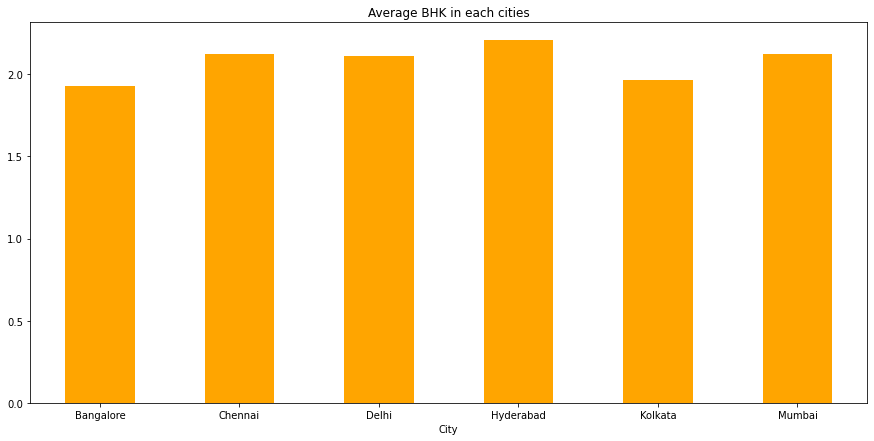

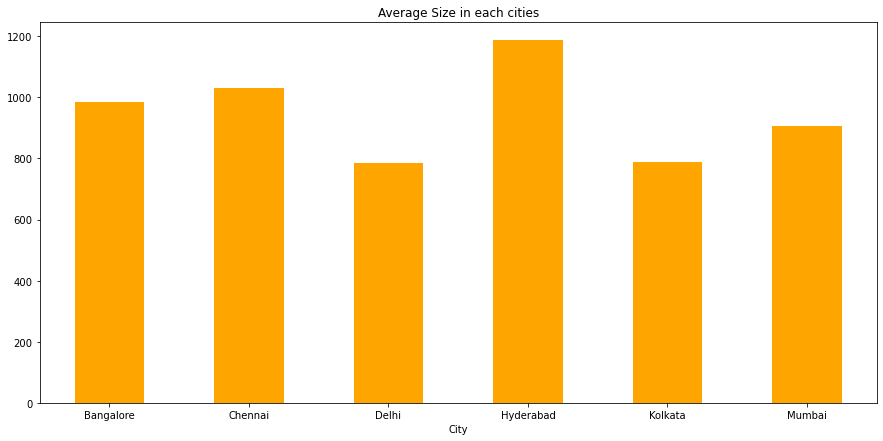

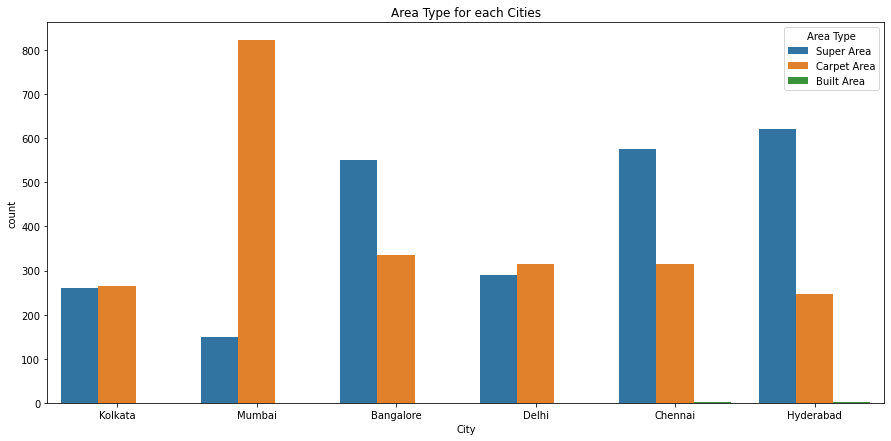

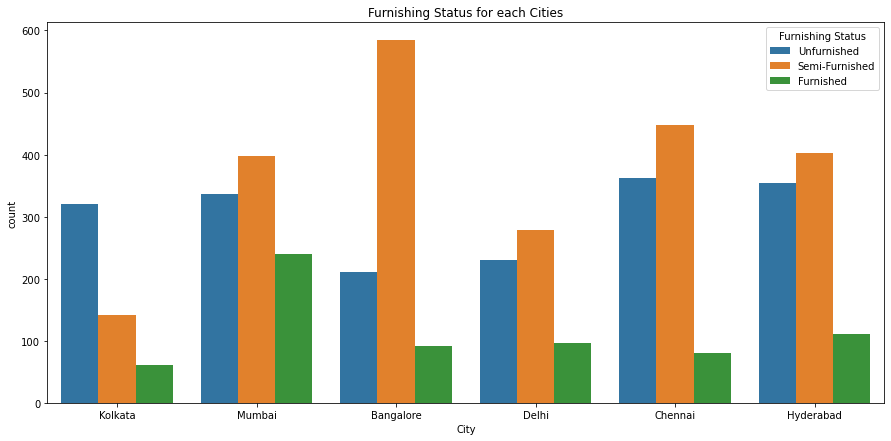

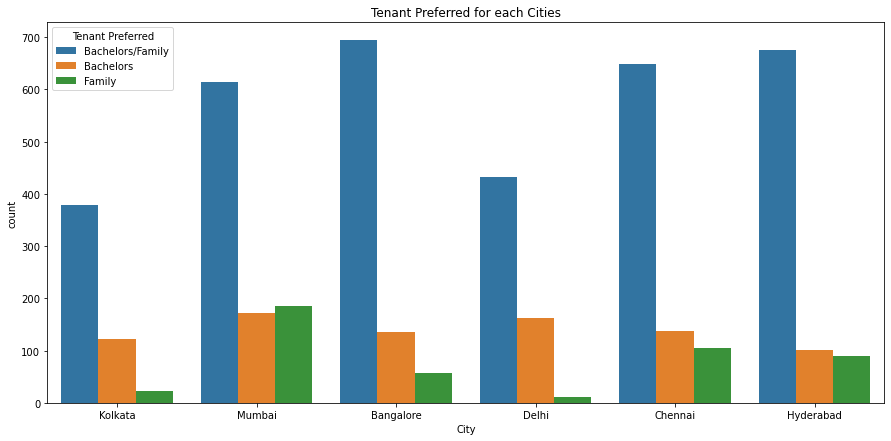

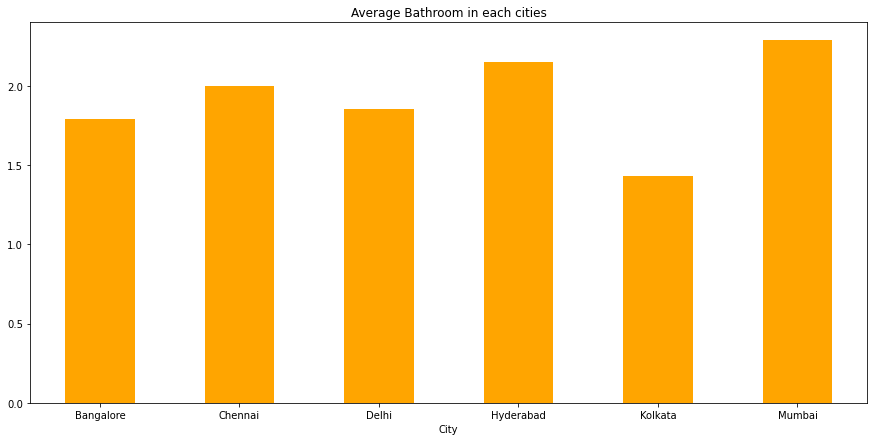

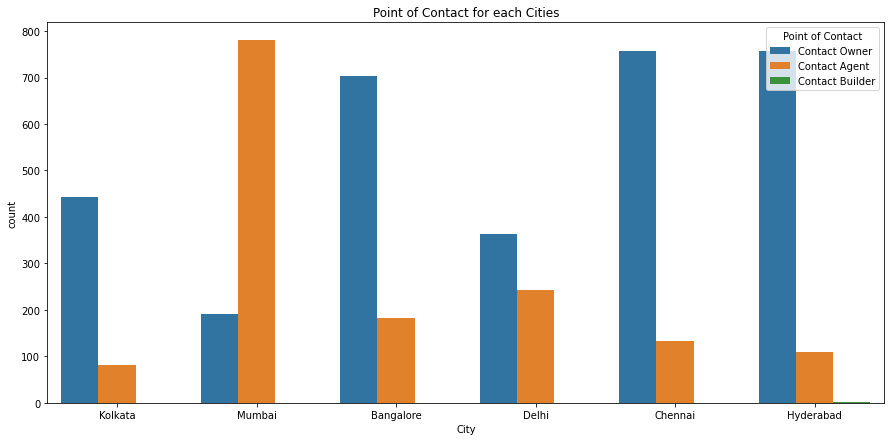

In [19]:
for ft in features:
    city_eda(df, ft)

- We see no difference between the factors features : "BHK", "Size", "Bathroom", "Tenant Preferent", "Furnishing Status"
- "Area Type" va "Point of Contact" of Mumbai is different from other cities
    - We will double check 2 features

### Average Price of "Area Type",  "Point of Contact"

In [15]:
ft_impact = ["Area Type", "Point of Contact"]
def avg_rent_ft(df, ft):
    plt.figure(figsize=(8, 5))
    df.groupby([ft])["Rent"].mean().plot(kind='bar', rot=0)
    plt.title(f"Average Price of {ft}")
    plt.show()

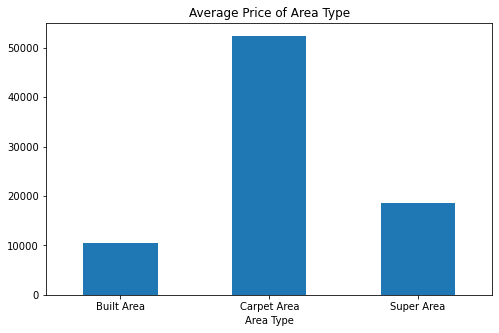

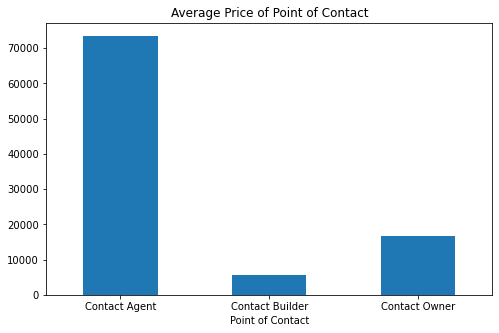

In [16]:
for ft in ft_impact:
    avg_rent_ft(df, ft)

- We can confirm 2 features "Area Type", "Point of Contact" have affected to rental price in Mumbai

## Explore "Posted On"

### Day with the most posts

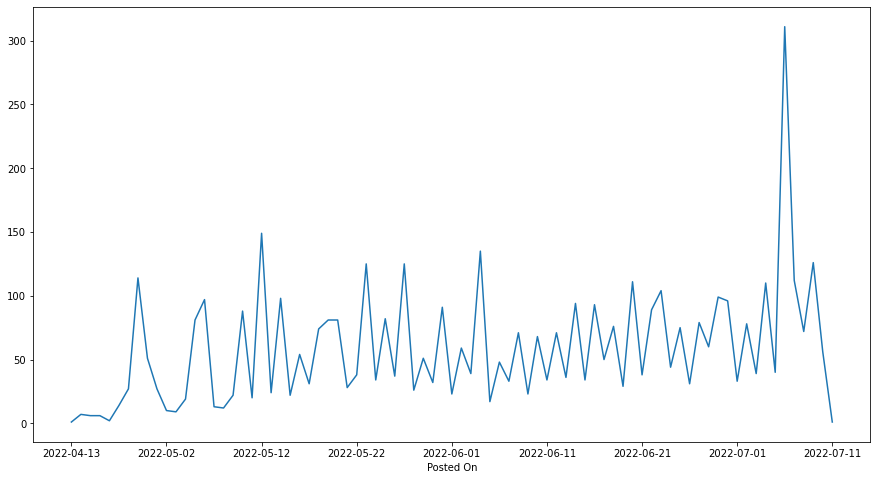

Day with hightes Posted 2022-07-06: 311 post


In [25]:
plt.figure(figsize=(15, 8))
ax = df.groupby(["Posted On"])["Rent"].count()
ymax = ax.max()
xmax = ax.index[ax.values == ymax][0]
ax.plot(kind='line')
# plt.annotate('Day with highest posed', xy=(xmax, ymax),
#              arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()
print(f"Day with hightes Posted {xmax}: {ymax} post")

### Compare the number of posts between days of the week

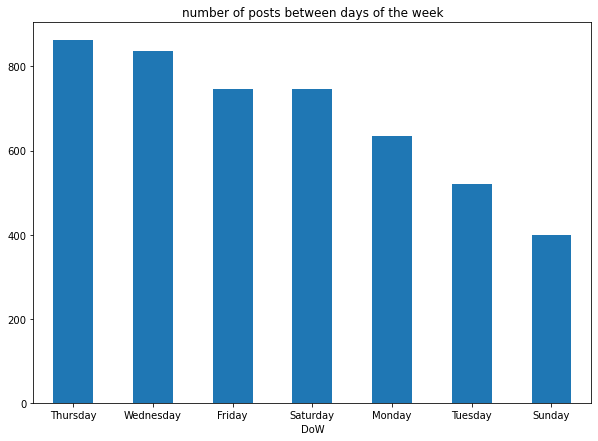

In [26]:
plt.figure(figsize=(10, 7))
df.groupby(["DoW"])["Rent"].count().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title("number of posts between days of the week")
plt.show()

House owner post on Wednesdays and Thursdays, so customers can book for their vacations

### Is there a difference in rental rates between weekdays?

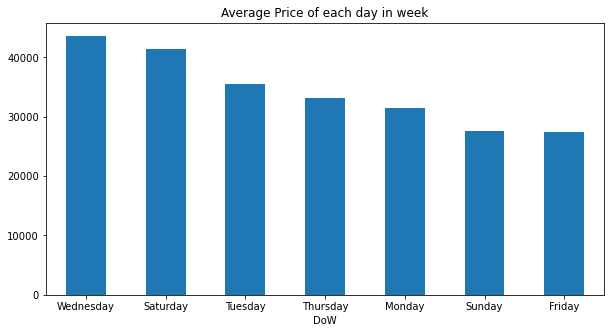

In [75]:
df.groupby(["DoW"])["Rent"].mean().sort_values(ascending=False).plot(kind='bar', rot=0, figsize=(10, 5))
plt.title("Average Price of each day in week")
plt.show()

Best day for booking is Friday